In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
 
warnings.filterwarnings('ignore')

In [2]:
allShots = pd.read_pickle("output/MAST-U_pedestal_allShots.pkl")

In [3]:
allShots['elong'].shape

(71957,)

In [4]:
allShots.keys()

dict_keys(['Shot', 'Times', 'W_ped', 'Beta_ped', 'W_ped_psin_te', 'W_ped_psin_ne', 'W_ped_psin_pe', 'H_ped_psin_te', 'H_ped_psin_ne', 'H_ped_psin_pe', 'W_ped_radius_te', 'W_ped_radius_ne', 'W_ped_radius_pe', 'H_ped_radius_te', 'H_ped_radius_ne', 'H_ped_radius_pe', 'Aratio', 'elong', 'delta'])

In [5]:
allShots['Beta_ped']

array([0.01053872, 0.02420952, 0.00309099, ..., 0.01218745, 0.01671536,
       0.0485085 ])

In [31]:
df = pd.DataFrame(np.transpose([allShots['Beta_ped']/allShots['W_ped'],allShots['W_ped'], allShots['Beta_ped'],  allShots['elong'], allShots['delta']]), columns =['Slope','Width', 'Height',  'Elongation', 'Triangularity'])
df = df[df['Height'] > df['Width']* 0.75] 
df = df[df['Width']<0.1]
df =df[df['Height']<0.35]
df = df[df['Slope']!= np.inf]
df.replace([np.inf, -np.inf], None)
df = df.dropna()


In [32]:
df.head()

,Slope,Width,Height,Elongation,Triangularity
22,0.867187,0.022123,0.019185,2.102782,0.475426
23,1.186517,0.050414,0.059817,2.082854,0.475694
24,1.348116,0.040710,0.054882,2.089521,0.475653
25,1.625763,0.043784,0.071183,2.081973,0.477411
26,1.359273,0.051775,0.070376,2.084107,0.480675


In [33]:
XparamWidth = df.iloc[:,1:2].values
XparamWidth

array([[0.02212281],
       [0.05041375],
       [0.04071038],
       ...,
       [0.01683109],
       [0.05834176],
       [0.05092664]])

In [34]:
yparamHeight = df.iloc[:,2].values
yparamHeight

array([0.01918461, 0.05981675, 0.05488234, ..., 0.01526855, 0.04648521,
       0.0423641 ])

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
 
# # Check for and handle categorical variables
# label_encoder = LabelEncoder()
# x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
# x_numerical = df.select_dtypes(exclude=['object']).values
# x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
# print(x[0])
 
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(XparamWidth, yparamHeight)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [36]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(XparamWidth)
 
# Evaluating the model
mse = mean_squared_error(yparamHeight, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(yparamHeight, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.12411821796020717
Mean Squared Error: 0.0008464854602797201
R-squared: 0.8201646967582661


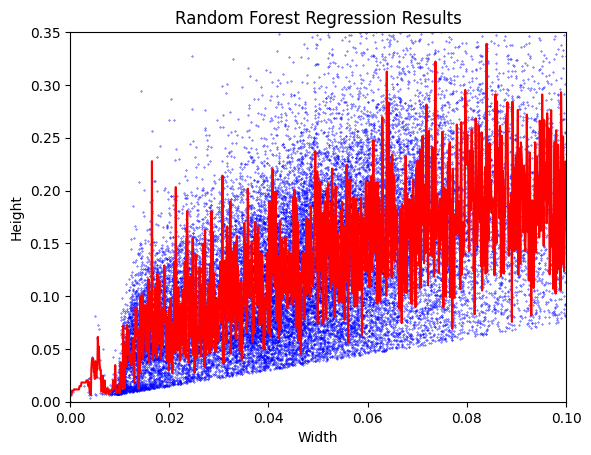

In [37]:
import numpy as np
#X_grid = np.arange(min(X),max(X),0.01)
X_grid = np.linspace(0, 0.1, 1000)
X_grid = X_grid.reshape(len(X_grid),1) 
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black', 'grey', 'white']
plt.scatter(df['Width'], df['Height'], color='blue', s=0.1) #plotting real points
# for i in range(50):
#     elong = np.ones(len(X_grid), dtype=float)*2
#     elong =elong.reshape(len(X_grid), 1)
#     delta = np.ones(len(X_grid), dtype=float)*(0.33+0.02*i)
#     delta =delta.reshape(len(X_grid), 1)
#     altogether = np.concatenate((X_grid, elong, delta), axis = 1)
#     plt.plot(X_grid, regressor.predict(altogether),color=(0.5+0.01*i, 0, 0)) #plotting for predict points

plt.plot(X_grid, regressor.predict(X_grid),color=(1, 0, 0)) #plotting for predict points

plt.xlim(0, .1)
plt.ylim(0, .35)
plt.title("Random Forest Regression Results")
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [39]:
#read pkl into df
allShots = pd.read_pickle("output/MAST-U_pedestal_allShots.pkl")
df = pd.DataFrame(np.transpose([allShots['Beta_ped']/allShots['W_ped'],allShots['W_ped'], allShots['Beta_ped'],  allShots['elong'], allShots['delta']]), columns =['Slope','Width', 'Height',  'Elongation', 'Triangularity'])

# clean data 
# filter L-mode
df = df[df['Height'] > df['Width']* 0.75] 
# limit spread to area around blob
df = df[df['Width']<0.1]
df = df[df['Height']<0.35]
df = df[df['Slope']!= np.inf]
df.replace([np.inf, -np.inf], None)
df = df.dropna()
df.head()

,Slope,Width,Height,Elongation,Triangularity
22,0.867187,0.022123,0.019185,2.102782,0.475426
23,1.186517,0.050414,0.059817,2.082854,0.475694
24,1.348116,0.040710,0.054882,2.089521,0.475653
25,1.625763,0.043784,0.071183,2.081973,0.477411
26,1.359273,0.051775,0.070376,2.084107,0.480675


In [42]:
df.iloc[:,3:5].values


array([[2.10278231, 0.47542627],
       [2.08285434, 0.4756942 ],
       [2.08952095, 0.47565277],
       ...,
       [2.18280108, 0.17343666],
       [2.15070415, 0.17418219],
       [2.15093524, 0.17263999]])

In [53]:
np.concatenate((df.iloc[:,3:4].values, df.iloc[:,4:5].values), axis=1)

array([[2.10278231, 0.47542627],
       [2.08285434, 0.4756942 ],
       [2.08952095, 0.47565277],
       ...,
       [2.18280108, 0.17343666],
       [2.15070415, 0.17418219],
       [2.15093524, 0.17263999]])

In [59]:
#parametersToFit
# 1 - Slope
# 2 - Width
# 3 - Height
# 4 - Elong
# 5 - Triang

def selectFitParameters(xparams):
    colNums = {'Slope':0, 'Width':1, 'Height':2, 'Elong':3, 'Delta':4}
    concatList = []
    for i in xparams:
        concatList += [df.iloc[:,colNums[i]:colNums[i]+1]]
    return np.concatenate(concatList, axis=1)

X = selectFitParameters(['Elong', "Delta"])
X

array([[2.10278231, 0.47542627],
       [2.08285434, 0.4756942 ],
       [2.08952095, 0.47565277],
       ...,
       [2.18280108, 0.17343666],
       [2.15070415, 0.17418219],
       [2.15093524, 0.17263999]])